In [4]:
import sys
from data.input_data import DatasetCreator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pathlib import Path

# Get the absolute path of the current file
current_file_path = Path('ensemble_model.ipynb').resolve()

# Get the directory of the current file
project_dir = current_file_path.parent

# Add the project directory to sys.path
sys.path.insert(0, str(project_dir))

# Step 1: Create Datasets
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
circles_dataset = dataset_creator.create_make_circles_dataset()

# Step 2: Split Data into Training, Validation, and Test Sets
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_circles, y_circles = circles_dataset['X'], circles_dataset['y']

# Split blob dataset into training and temporary (remaining) data
X_blob_train_temp, X_blob_test, y_blob_train_temp, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2,
                                                                                  random_state=42)
X_blob_train, X_blob_val, y_blob_train, y_blob_val = train_test_split(X_blob_train_temp, y_blob_train_temp,
                                                                      test_size=0.25, random_state=42)

print(f"Blob Dataset:")
print(f"Train set: {X_blob_train.shape}, Validation set: {X_blob_val.shape}, Test set: {X_blob_test.shape}")

# Split circles dataset into training and temporary (remaining) data
X_circles_train_temp, X_circles_test, y_circles_train_temp, y_circles_test = train_test_split(X_circles, y_circles,
                                                                                              test_size=0.2,
                                                                                              random_state=42)
X_circles_train, X_circles_val, y_circles_train, y_circles_val = train_test_split(X_circles_train_temp,
                                                                                  y_circles_train_temp, test_size=0.25,
                                                                                  random_state=42)

print(f"\nCircles Dataset:")
print(f"Train set: {X_circles_train.shape}, Validation set: {X_circles_val.shape}, Test set: {X_circles_test.shape}")

Blob Dataset:
Train set: (660, 2), Validation set: (220, 2), Test set: (220, 2)

Circles Dataset:
Train set: (300, 2), Validation set: (100, 2), Test set: (100, 2)


In [5]:
# Step 3: Define a function to train and evaluate RandomForest models with different hyperparameters
def train_evaluate_rf(X_train, y_train, X_val, y_val, n_estimators_list, max_depth_list):
    results = []

    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            rf.fit(X_train, y_train)
            val_pred = rf.predict(X_val)
            accuracy = accuracy_score(y_val, val_pred)
            results.append((n_estimators, max_depth, accuracy))
            print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, Validation Accuracy: {accuracy:.4f}")

    return results


# Hyperparameters to test
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [None, 10, 20, 30]

# Train and evaluate on blob dataset
blob_results = train_evaluate_rf(X_blob_train, y_blob_train, X_blob_val, y_blob_val, n_estimators_list, max_depth_list)

# Train and evaluate on circles dataset
circles_results = train_evaluate_rf(X_circles_train, y_circles_train, X_circles_val, y_circles_val, n_estimators_list, max_depth_list)

n_estimators: 10, max_depth: None, Validation Accuracy: 0.9545
n_estimators: 10, max_depth: 10, Validation Accuracy: 0.9591
n_estimators: 10, max_depth: 20, Validation Accuracy: 0.9545
n_estimators: 10, max_depth: 30, Validation Accuracy: 0.9545
n_estimators: 50, max_depth: None, Validation Accuracy: 0.9591
n_estimators: 50, max_depth: 10, Validation Accuracy: 0.9591
n_estimators: 50, max_depth: 20, Validation Accuracy: 0.9591
n_estimators: 50, max_depth: 30, Validation Accuracy: 0.9591
n_estimators: 100, max_depth: None, Validation Accuracy: 0.9500
n_estimators: 100, max_depth: 10, Validation Accuracy: 0.9545
n_estimators: 100, max_depth: 20, Validation Accuracy: 0.9500
n_estimators: 100, max_depth: 30, Validation Accuracy: 0.9500
n_estimators: 200, max_depth: None, Validation Accuracy: 0.9545
n_estimators: 200, max_depth: 10, Validation Accuracy: 0.9591
n_estimators: 200, max_depth: 20, Validation Accuracy: 0.9545
n_estimators: 200, max_depth: 30, Validation Accuracy: 0.9545
n_estima

In [6]:
# Step 4: Plot the results
def plot_results(results, dataset_name):
    n_estimators_values = list(set([r[0] for r in results]))
    n_estimators_values.sort()

    for max_depth in max_depth_list:
        accuracies = [r[2] for r in results if r[1] == max_depth]
        plt.plot(n_estimators_values, accuracies, label=f"max_depth={max_depth}")

    plt.xlabel('Number of Estimators')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Random Forest Performance on {dataset_name} Dataset')
    plt.legend()
    plt.show()
    

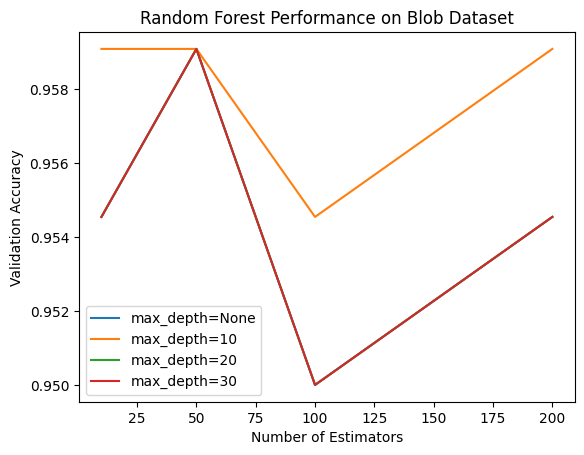

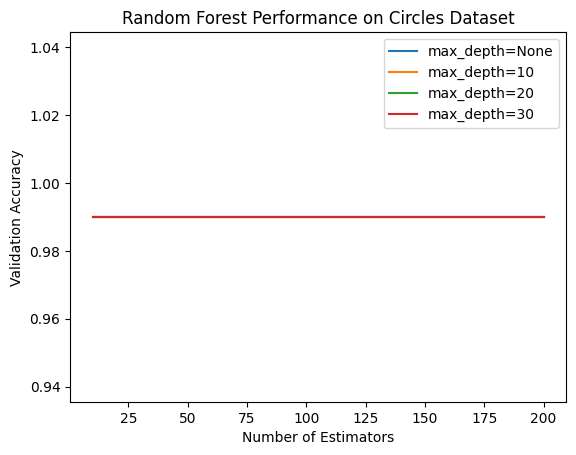

In [7]:
plot_results(blob_results, "Blob")
plot_results(circles_results, "Circles")

In [8]:
# Step 5: Evaluate the best ensemble on the test set
def evaluate_on_test_set(X_train, y_train, X_test, y_test, best_params):
    rf = RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], random_state=42)
    rf.fit(X_train, y_train)
    test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")


# Assuming best_params are (n_estimators, max_depth)
best_params_blob = max(blob_results, key=lambda x: x[2])
best_params_circles = max(circles_results, key=lambda x: x[2])

print("\nEvaluating the best ensemble on the test set for Blob dataset")
evaluate_on_test_set(X_blob_train, y_blob_train, X_blob_test, y_blob_test, best_params_blob)

print("\nEvaluating the best ensemble on the test set for Circles dataset")
evaluate_on_test_set(X_circles_train, y_circles_train, X_circles_test, y_circles_test, best_params_circles)



Evaluating the best ensemble on the test set for Blob dataset
Test Accuracy: 0.9636

Evaluating the best ensemble on the test set for Circles dataset
Test Accuracy: 0.9700
